In [1]:
# Generating Example Classification Data

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
h = 1
sd = 1 #standerd deviation
n= 50   # no of obeservation 

def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

In [3]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [4]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [5]:
def plot_data(x1, y1 ,x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.xlabel("$X_2$")

<IPython.core.display.Javascript object>


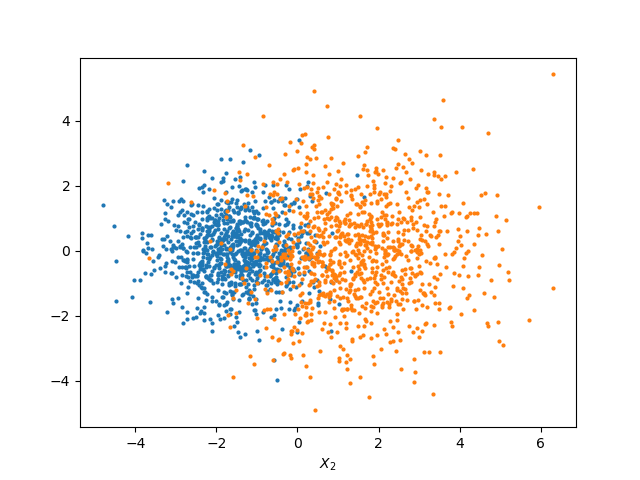

In [6]:
plot_data(x1, y1 ,x2, y2)

<IPython.core.display.Javascript object>


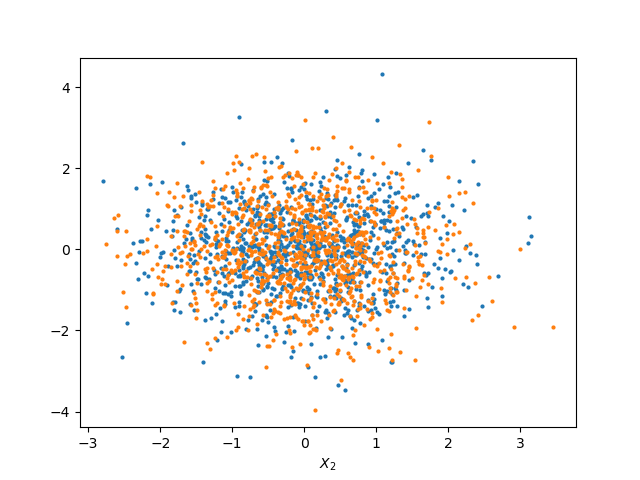

In [7]:
(x1, y1, x2, y2) = gen_data(1000, 0, 1, 1)
plot_data(x1, y1 ,x2, y2)

<IPython.core.display.Javascript object>


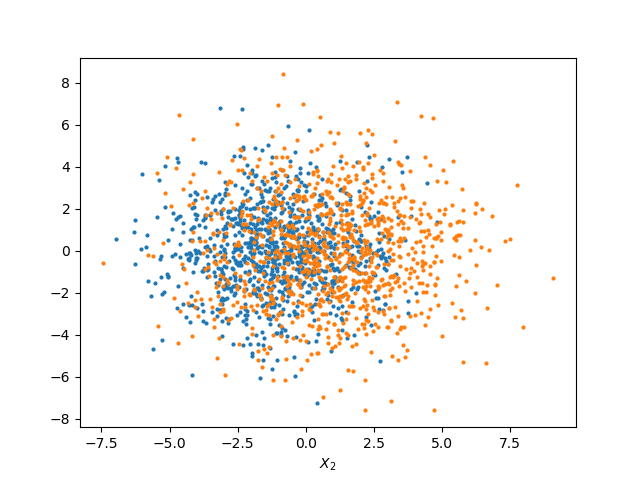

In [8]:
(x1, y1, x2, y2) = gen_data(1000, 1, 2, 2.5)
plot_data(x1, y1 ,x2, y2)

<IPython.core.display.Javascript object>


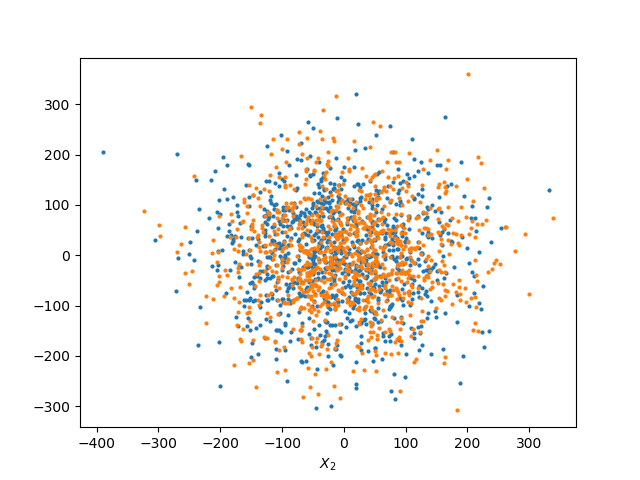

In [9]:
(x1, y1, x2, y2) = gen_data(1000, 10, 100, 100)
plot_data(x1, y1 ,x2, y2)

<IPython.core.display.Javascript object>


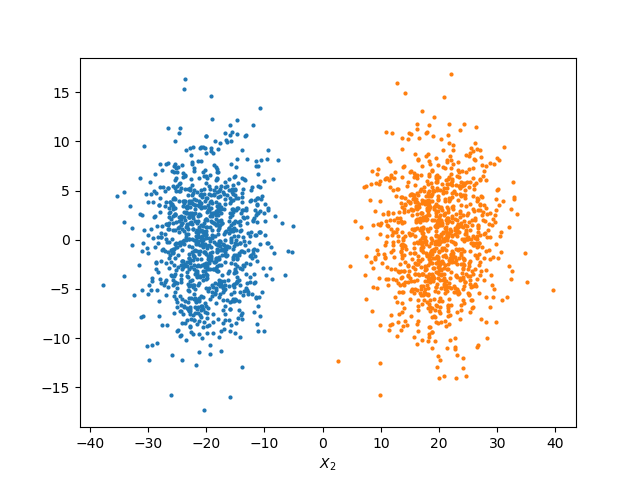

In [10]:
(x1, y1, x2, y2) = gen_data(1000, 20, 5, 5)
plot_data(x1, y1 ,x2, y2)

In [12]:
# Logistic Regression- a binary classifier
# conditional class probablity

def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [15]:
prob_to_odds(0.8)

4.000000000000001

In [71]:
# logistic Regression in Code
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=1, multi_class='ovr',solver='liblinear')

# X matrix(row corospond to observation, column corospond to predictors)
# y vector


print(x.shape)


n=1000
y = np.hstack((np.repeat(1,n),np.repeat(2,n)))
print(y.shape)

(2000, 2)
(2000,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state =1)

In [73]:
print(X_train.shape)
print(y_train.shape)

print(clf.fit(X_train, y_train ))
print(clf.score(X_test, y_test ))

(1000, 2)
(1000,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.892


In [74]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.96874899, 0.03125101]])

In [79]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [80]:
# Computing Predictive Probablities Across the Grid

def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


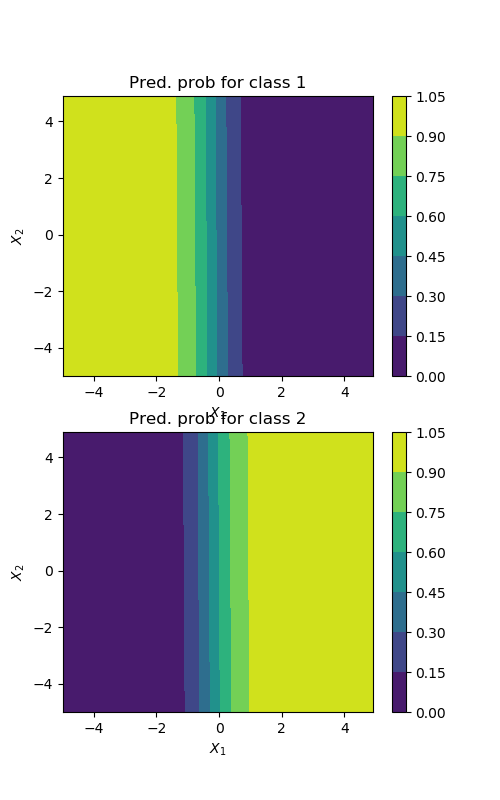

Text(0.5, 1.0, 'Pred. prob for class 2')

In [81]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2")